In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [147]:
df = pd.read_csv("542_proj_dataset_1_v1.0\OnlineNewsPopularity.csv")
df = df.drop([31037, 16281, 16294, 16268], axis = 0)
df = df.drop(df[df["shares"] > 50000].index, axis = 0)
#df = df.drop(df[df["num_hrefs"] > 300].index, axis = 0)
df = df.drop(df[df["self_reference_min_shares"] > 400000].index, axis = 0)
df = df.drop(df[df["self_reference_max_shares"] > 400000].index, axis = 0)
df = df.drop(df[df["self_reference_avg_sharess"] > 400000].index, axis = 0)
df = df.drop(["url"], axis = 1)
df = df.drop(["n_non_stop_words"], axis = 1)
df = df.drop(df[df["average_token_length"] ==0].index, axis = 0)
#df = df[:10000]

In [148]:
df = df.filter(["average_token_length", "shares"])
df

,average_token_length,shares
0,4.680365,593
1,4.913725,711
2,4.393365,1500
3,4.404896,1200
4,4.682836,505
...,...,...
39639,4.523121,1800
39640,4.405488,1900
39641,5.076923,1900
39642,4.975073,1100


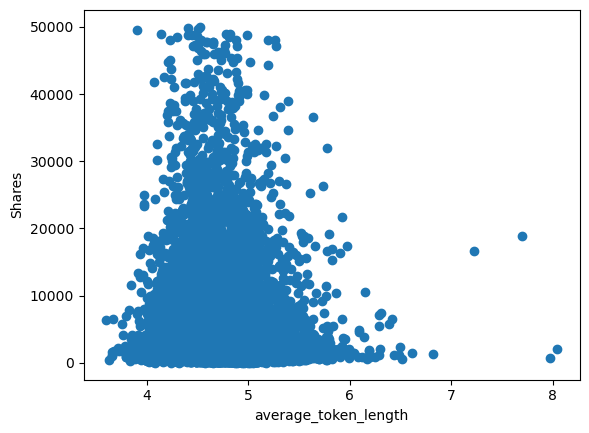

In [153]:
X = df.drop(["shares"], axis=1)
y = df["shares"]
plt.xlabel("average_token_length")
plt.ylabel("Shares")
plt.scatter(X, y)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [156]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [157]:
lrobj = LinearRegression()
lrobj.fit(X, y)

LinearRegression()

In [158]:
pred_y = lrobj.predict(X)
pred_y_formula = lrobj.intercept_ + lrobj.coef_ * X

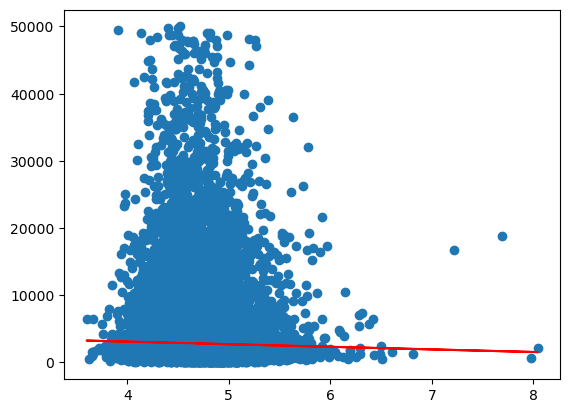

In [159]:
plt.scatter(X, y)
plt.plot(X, pred_y_formula, 'r')


In [97]:
prObj = PolynomialFeatures(degree = 2)
X_transformed = prObj.fit_transform(X)

In [98]:
lrobj = LinearRegression()
lrobj.fit(X_transformed, y)

LinearRegression()

In [99]:
pred_y = lrobj.predict(X_transformed)

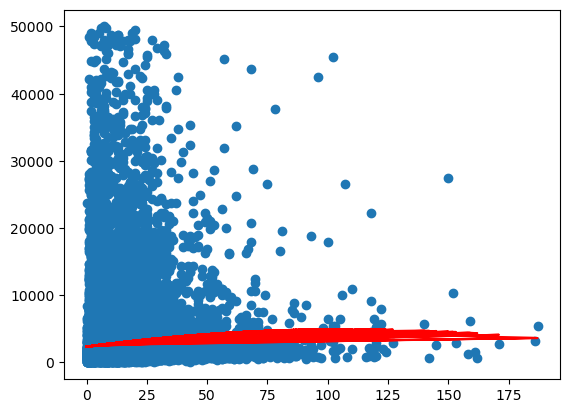

In [100]:
plt.plot(X, pred_y, 'r')
plt.scatter(X, y)

In [102]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
r_sq

0.715875613747954

In [106]:
y_pred = model.intercept_ + model.coef_ * x

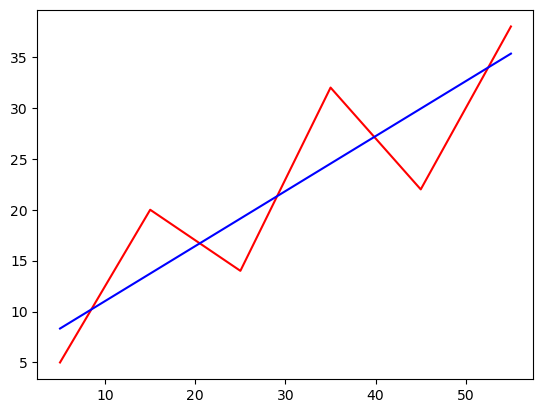

In [107]:
plt.plot(x, y, 'r')
plt.plot(x, y_pred, 'b')

In [3]:

import requests 
  
# Making a GET request 
r = requests.get('https://docs.google.com/spreadsheets/d/1ckUJhD7MGMFlbYPiLR9xMoOk8dpSbi8RP3v9D3KP9HE/edit#gid=1579629409') 
  
# check status code for response received 
# success code - 200 
print(r) 
  
# print content of request 
print(r.content)

<Response [401]>
b'<!DOCTYPE html><style nonce="t7kkqVXklf8l8ZhKKLVQKg">.document-root,body,html{height:100%;width:100%}.button{border:none;cursor:pointer;color:#0b57d0;font-family:Google Sans Text,Roboto,sans-serif;font-size:14px;border-radius:100px;padding:12px;margin:0 8px;text-decoration:none}.button:hover{background-color:rgba(11,87,208,.078)}.button:active,.button:focus{background-color:rgba(11,87,208,.122)}.button.primary-button,.button.primary-button:active,.button.primary-button:focus,.button.primary-button:hover{background-color:#0b57d0;color:#fff;padding:12px 24px}.button.primary-button:hover{box-shadow:0 1px 3px 1px rgba(0,0,0,.149),0 1px 2px 0 rgba(0,0,0,.302)}.icon{height:48px}.container{width:800px;height:212px;-webkit-box-orient:vertical;-webkit-box-direction:normal;-webkit-flex-direction:column;-moz-box-orient:vertical;-moz-box-direction:normal;-ms-flex-direction:column;flex-direction:column;display:-webkit-box;display:-webkit-flex;display:-moz-box;display:-ms-flexbox;